In [109]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv("/Users/tovancao/Ironhack/second_hand_luxury_project/data/raw/vestiaire.csv")
df.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [7]:
df.shape

(900514, 36)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [9]:
df.isnull().sum()

product_id                         0
product_type                       0
product_name                       0
product_description                7
product_keywords                1183
product_gender_target              0
product_category                1183
product_season                     2
product_condition                  0
product_like_count                 0
sold                               0
reserved                           0
available                          0
in_stock                           0
should_be_gone                     0
brand_id                           0
brand_name                         0
brand_url                          0
product_material                   4
product_color                      1
price_usd                          0
seller_price                       0
seller_earning                     0
seller_badge                       0
has_cross_border_fees          13736
buyers_fees                    13736
warehouse_name                     0
s

In [10]:
# Stock consistency

In [11]:
a = df['sold'].sum()

In [12]:
df['reserved'].sum()

0

In [13]:
b = df['available'].sum()

In [14]:
c = df['in_stock'].sum() + df['should_be_gone'].sum()

In [15]:
(a + b + c) / df['product_id'].count()

0.9646746191619453

Around 4% of the products don't have a status

In [17]:
df.nunique()

product_id                    900514
product_type                   10984
product_name                  529656
product_description           836024
product_keywords              124614
product_gender_target              2
product_category                   6
product_season                     3
product_condition                  5
product_like_count               353
sold                               2
reserved                           1
available                          2
in_stock                           2
should_be_gone                     2
brand_id                        8884
brand_name                      8884
brand_url                       8859
product_material                  70
product_color                     30
price_usd                      25000
seller_price                   23067
seller_earning                 36019
seller_badge                       3
has_cross_border_fees              1
buyers_fees                    15776
warehouse_name                     6
s

# Data Cleaning

In [19]:
df1 = df.copy()

In [20]:
df1.columns

Index(['product_id', 'product_type', 'product_name', 'product_description',
       'product_keywords', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_like_count', 'sold',
       'reserved', 'available', 'in_stock', 'should_be_gone', 'brand_id',
       'brand_name', 'brand_url', 'product_material', 'product_color',
       'price_usd', 'seller_price', 'seller_earning', 'seller_badge',
       'has_cross_border_fees', 'buyers_fees', 'warehouse_name', 'seller_id',
       'seller_username', 'usually_ships_within', 'seller_country',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [22]:
(df1.isna().mean() * 100).sum()

20.50850958452617

20.5% of data is missing from the dataset.

In [24]:
df1.isna().mean() * 100

product_id                     0.000000
product_type                   0.000000
product_name                   0.000000
product_description            0.000777
product_keywords               0.131369
product_gender_target          0.000000
product_category               0.131369
product_season                 0.000222
product_condition              0.000000
product_like_count             0.000000
sold                           0.000000
reserved                       0.000000
available                      0.000000
in_stock                       0.000000
should_be_gone                 0.000000
brand_id                       0.000000
brand_name                     0.000000
brand_url                      0.000000
product_material               0.000444
product_color                  0.000111
price_usd                      0.000000
seller_price                   0.000000
seller_earning                 0.000000
seller_badge                   0.000000
has_cross_border_fees          1.525351


The column usually_ships_within has the highest number of missing values (17.2%). Given that this column is of type object, we will replace these missing values with the most common one using the mode. As for the remaining 3.3% missing values, we will identify columns with categorical data and replace them using the mode or median for numerical columns. Any remaining missing values will be removed from the dataset. Doing so we will make sure to keep the other columns informations that can still be interesting for our analysis.

In [26]:
# Filling missing values with the mode for categorical columns
df1['usually_ships_within'] = df1['usually_ships_within'].fillna(df1['usually_ships_within'].mode()[0])
df1['product_category'] = df1['product_category'].fillna(df1['product_category'].mode()[0])
df1['product_keywords'] = df1['product_keywords'].fillna(df1['product_keywords'].mode()[0])

# Filling missing values with the median for numerical columns
df1['buyers_fees'] = df1['buyers_fees'].fillna(df1['buyers_fees'].median())

In [27]:
df1[['has_cross_border_fees']].value_counts()

has_cross_border_fees
True                     886778
Name: count, dtype: int64

In the `has_cross_border_fees` column, all existing values are True. Therefore, for any missing values in this column, we will replace them with 'False'.

In [29]:
df1['has_cross_border_fees'].fillna(False, inplace=True)

/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_96211/669956893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['has_cross_border_fees'].fillna(False, inplace=True)
/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_96211/669956893.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d

In [30]:
print(f'Percentage of missing values: {(df1.isna().mean() * 100).sum().round(4)}')

Percentage of missing values: 0.0059


In [31]:
df1.dropna(inplace=True)

In [32]:
print(f'Percentage of missing values: {(df1.isna().mean() * 100).sum()}')

Percentage of missing values: 0.0


In [33]:
df1.shape

(900461, 36)

In [34]:
print(f'Amount of duplicates: {df1.duplicated().sum()}')

Amount of duplicates: 0


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900461 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900461 non-null  int64  
 1   product_type                900461 non-null  object 
 2   product_name                900461 non-null  object 
 3   product_description         900461 non-null  object 
 4   product_keywords            900461 non-null  object 
 5   product_gender_target       900461 non-null  object 
 6   product_category            900461 non-null  object 
 7   product_season              900461 non-null  object 
 8   product_condition           900461 non-null  object 
 9   product_like_count          900461 non-null  float64
 10  sold                        900461 non-null  bool   
 11  reserved                    900461 non-null  bool   
 12  available                   900461 non-null  bool   
 13  in_stock           

In [36]:
# Transforming Boolean columns to integer
bool_columns = ["sold", "reserved","available","in_stock","should_be_gone","has_cross_border_fees"]

# Convert multiple boolean columns to integers
df1[bool_columns] = df1[bool_columns].astype(int)

In [37]:
#creating new columns to have a more precise product type

# Split the column by whitespace and keep only the last word
df1['last_word_product_type'] = df1['product_type'].apply(lambda x: x.split()[-1])

df1.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,last_word_product_type
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,25775970,vitalii25775970,1-2 days,Germany,3.0,14.0,0.0,13.0,0.0,skirt
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,13698770,olivia13698770,1-2 days,Belgium,0.0,0.0,0.0,8.0,0.0,Jacket
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0,coat
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0,skirt
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0,trousers


In [38]:
#convert to lowercase
df1['last_word_product_type'] = df1['last_word_product_type'].apply(lambda x: x.lower())

df1.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,last_word_product_type
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,25775970,vitalii25775970,1-2 days,Germany,3.0,14.0,0.0,13.0,0.0,skirt
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,13698770,olivia13698770,1-2 days,Belgium,0.0,0.0,0.0,8.0,0.0,jacket
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0,coat
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0,skirt
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0,trousers


In [39]:
df1['last_word_product_type'].unique()

array(['skirt', 'jacket', 'coat', 'trousers', 'dress', 'top', 'swimsuit',
       'blazer', 'suit', 'shirt', 'jeans', 'blouse', 'shorts', 'set',
       'vest', 'pants', 'tunic', 't-shirt', 'jumper', 'caban', 'bermuda',
       'corset', 'knitwear', 'jumpsuit', 'tight', 'polo', 'short',
       'sweatshirt', 'lingerie', 'bra', 'parka', 'cardigan', 'peacoat',
       'slip', 'leggings', 'camisole', 'twin-set', 'harem', 'puffer',
       'cape', 'dufflecoat', 'combishort', 'swimwear', 'pareo', 'poncho',
       'string', 'bustier', 'overall', 'accessory', 'pull', 'trench',
       'trenchcoat', 'jean', 'laine', 'sunglasses', 'tie', 'watch', 'hat',
       'square', 'jewellery', 'belt', 'cufflinks', 'gloves', 'lifestyle',
       'neckerchief', 'scarf', 'beanie', 'wallet', 'handkerchief', 'cap',
       'purse', 'stole', 'clutch', 'glasses', 'ring', 'mittens', 'panama',
       'beret', 'choker', 'cheche', 'diary', 'case', 'accessories',
       'embellishments', 'trainers', 'flats', 'ups', 'sandals',

# Exploratory Data Analysis

In [41]:
df1.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,last_word_product_type
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,25775970,vitalii25775970,1-2 days,Germany,3.0,14.0,0.0,13.0,0.0,skirt
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,13698770,olivia13698770,1-2 days,Belgium,0.0,0.0,0.0,8.0,0.0,jacket
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0,coat
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0,skirt
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0,trousers


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900461 entries, 0 to 900513
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900461 non-null  int64  
 1   product_type                900461 non-null  object 
 2   product_name                900461 non-null  object 
 3   product_description         900461 non-null  object 
 4   product_keywords            900461 non-null  object 
 5   product_gender_target       900461 non-null  object 
 6   product_category            900461 non-null  object 
 7   product_season              900461 non-null  object 
 8   product_condition           900461 non-null  object 
 9   product_like_count          900461 non-null  float64
 10  sold                        900461 non-null  int64  
 11  reserved                    900461 non-null  int64  
 12  available                   900461 non-null  int64  
 13  in_stock           

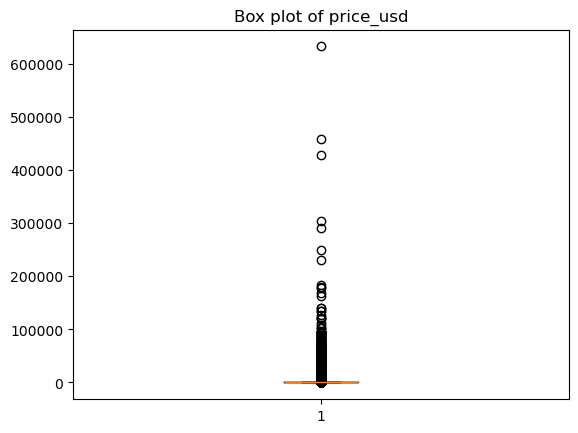

In [43]:
import matplotlib.pyplot as plt

# For a single column, e.g., 'price_usd'
plt.boxplot(df1['price_usd'])
plt.title('Box plot of price_usd')
plt.show()

In [197]:
# Step 1: Filter out rows with price_usd > 200000
df2 = df1[df1['price_usd'] <= 10000]

# Step 2: Verify the result
print(df2)
# Optionally, display some statistics to verify outlier removal
df2['price_usd'].describe()

        product_id            product_type  \
0         43247626         Wool mini skirt   
1         43247441                  Jacket   
2         43246517               Wool coat   
3         43246507              Mini skirt   
4         43246417  Vegan leather trousers   
...            ...                     ...   
900509    41538360        Glitter trainers   
900510    41532271           Leather heels   
900511    41538140    Leather cowboy boots   
900512    41537603    Leather ballet flats   
900513    41534820    J'adior cloth sandal   

                                             product_name  \
0       Wool mini skirt Miu Miu Grey size S Internatio...   
1           Jacket Barbara Bui Navy size 42 FR in Cotton    
2       Wool coat Comme Des Garcons White size S Inter...   
3          Mini skirt MSGM Black size 38 IT in Polyester    
4       Vegan leather trousers LVIR Black size 36 FR i...   
...                                                   ...   
900509  Glitter trai

count    898314.000000
mean        332.727952
std         621.657681
min           6.130000
25%          83.070000
50%         167.420000
75%         345.060000
max       10000.000000
Name: price_usd, dtype: float64

## ANALYSIS MEN BY CATEGORY AND TYPE

## Overall observations

In [199]:
import pandas as pd

# Assuming df is your DataFrame
# Step 1: Count of products by gender
gender_counts = df2['product_gender_target'].value_counts()

# Step 2: Total number of products
total_products = gender_counts.sum()

# Step 3: Percentages of products by gender
gender_percentages = (gender_counts / total_products) * 100

# Step 4: Average price for each gender
average_prices = df2.groupby('product_gender_target')['price_usd'].mean()

# Step 5: Combine into a DataFrame
summary_df = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percentages,
    'Average Price': average_prices
})

summary_df = summary_df.round({'Percentage': 2, 'Average Price': 2})

# Reset the index to make 'product_gender_target' a column
summary_df = summary_df.reset_index().rename(columns={'index': 'product_gender_target'})
summary_df = summary_df.sort_values(by='Count', ascending=False)

summary_df

,product_gender_target,Count,Percentage,Average Price
1,Women,481690,53.62,320.61
0,Men,416624,46.38,346.74


In [324]:
summary_df.to_csv('summary_df.csv', index=False)

In [332]:
# Filter the DataFrame for "Men" products
men_df = df2[df2['product_gender_target'] == 'Men']

# Step 1: Count of products by category for "Men"
category_counts = men_df['product_category'].value_counts()

# Step 2: Total number of "Men" products
total_men_products = category_counts.sum()

# Step 3: Percentages of products by category for "Men"
category_percentages = (category_counts / total_men_products) * 100

# Step 4: Average price for each category for "Men"
category_average_prices = men_df.groupby('product_category')['price_usd'].mean()

# Step 5: Combine into a DataFrame
summary_df_men = pd.DataFrame({
    'Count': category_counts,
    'Percentage': category_percentages,
    'Average Price': category_average_prices
})

summary_df_men = summary_df_men.round({'Percentage': 2, 'Average Price': 2})

# Reset the index to make 'product_category' a column
summary_df_men = summary_df_men.reset_index().rename(columns={'index': 'product_category'})
summary_df_men = summary_df_men.sort_values(by='Count', ascending=False)
summary_df_men

,product_category,Count,Percentage,Average Price
1,Men Clothing,193848,46.53,290.13
2,Men Shoes,125383,30.10,324.54
0,Men Accessories,97393,23.38,488.00


In [334]:
summary_df_men.to_csv('summary_df_men_cat.csv', index=False)

## Focus on men product category

In [201]:
# Step 2: Include the `last_word_product_type` column specifically for Men
men_df = df2[df2['product_gender_target'] == 'Men']

# Step 3: Count of products by category and `last_word_product_type` for "Men"
category_counts = men_df.groupby(['product_category', 'last_word_product_type']).size()

# Step 4: Total number of "Men" products for percentage calculation
total_men_products = category_counts.sum()

# Step 5: Percentages of products by category and `last_word_product_type` for "Men"
category_percentages = (category_counts / total_men_products) * 100

# Step 6: Average price for each category and `last_word_product_type` for "Men"
category_average_prices = men_df.groupby(['product_category', 'last_word_product_type'])['price_usd'].mean()

# Step 7: Combine into a DataFrame
summary_df_men = pd.DataFrame({
    'Count': category_counts,
    'Percentage': category_percentages,
    'Average Price': category_average_prices
}).reset_index()

# Step 8: Round values to 2 decimal places
summary_df_men = summary_df_men.round({'Percentage': 2, 'Average Price': 2})
summary_df_men = summary_df_men.sort_values(by='Count', ascending=False)
# Display the resulting DataFrame
summary_df_men



,product_category,last_word_product_type,Count,Percentage,Average Price
51,Men Shoes,trainers,65017,15.61,307.28
19,Men Clothing,jacket,32514,7.80,478.15
8,Men Accessories,tie,27968,6.71,82.88
29,Men Clothing,shirt,25940,6.23,163.22
35,Men Clothing,sweatshirt,21717,5.21,241.90
44,Men Clothing,vest,20000,4.80,335.32
37,Men Clothing,t-shirt,19455,4.67,156.00
7,Men Accessories,sunglasses,18475,4.43,246.42
47,Men Shoes,flats,18302,4.39,322.91
52,Men Shoes,ups,17668,4.24,307.57


In [320]:
summary_df_men.to_csv('summary_df_men_product_type.csv', index=False)

In [203]:
import pandas as pd


# Step 2: Include the `last_word_product_type` column and focus on Men products
men_df = df2[df2['product_gender_target'] == 'Men']

# Step 3: Calculate total sales by product_category and last_word_product_type
sales_by_category = men_df.groupby(['product_category', 'last_word_product_type']).agg({'price_usd': 'sum'}).reset_index()
sales_by_category = sales_by_category.rename(columns={'price_usd': 'total_sales'})

# Step 4: Calculate the cumulative sum and percentage of the total sales
sales_by_category = sales_by_category.sort_values(by='total_sales', ascending=False)
sales_by_category['cumulative_sales'] = sales_by_category['total_sales'].cumsum()
total_sales = sales_by_category['total_sales'].sum()
sales_by_category['cumulative_percentage'] = (sales_by_category['cumulative_sales'] / total_sales) * 100

# Step 5: Identify the top categories based on the Pareto rule (cumulative percentage <= 80)
top_categories = sales_by_category[sales_by_category['cumulative_percentage'] <= 80]

# Step 6: Create the summary DataFrame with the required metrics for the top categories
category_counts = men_df.groupby(['product_category', 'last_word_product_type']).size()
category_percentages = (category_counts / category_counts.sum()) * 100
category_average_prices = men_df.groupby(['product_category', 'last_word_product_type'])['price_usd'].mean()

# Combine into a final DataFrame
summary_df_men = pd.DataFrame({
    'Count': category_counts,
    'Percentage': category_percentages,
    'Average Price': category_average_prices
}).reset_index()

# Round values to 2 decimal places
summary_df_men = summary_df_men.round({'Percentage': 2, 'Average Price': 2})
summary_df_men = summary_df_men.sort_values(by='Count', ascending=False)

# Filter summary DataFrame for the top categories
pareto_df = summary_df_men.merge(top_categories[['product_category', 'last_word_product_type']], how='inner', on=['product_category', 'last_word_product_type'])
pareto_df

,product_category,last_word_product_type,Count,Percentage,Average Price
0,Men Shoes,trainers,65017,15.61,307.28
1,Men Clothing,jacket,32514,7.80,478.15
2,Men Clothing,shirt,25940,6.23,163.22
3,Men Clothing,sweatshirt,21717,5.21,241.90
4,Men Clothing,vest,20000,4.80,335.32
5,Men Accessories,sunglasses,18475,4.43,246.42
6,Men Shoes,flats,18302,4.39,322.91
7,Men Shoes,ups,17668,4.24,307.57
8,Men Accessories,watch,17644,4.23,1779.47
9,Men Clothing,pull,16060,3.85,224.06


In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the data for visualization
men_df['Category'] = men_df['is_watch'].apply(lambda x: 'Watch' if x == 1 else 'Non-Watch')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='price_usd', data=men_df)
plt.title('Boxplot of Prices for Watches and Non-Watches (Men\'s Products)')
plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.show()

KeyError: 'is_watch'

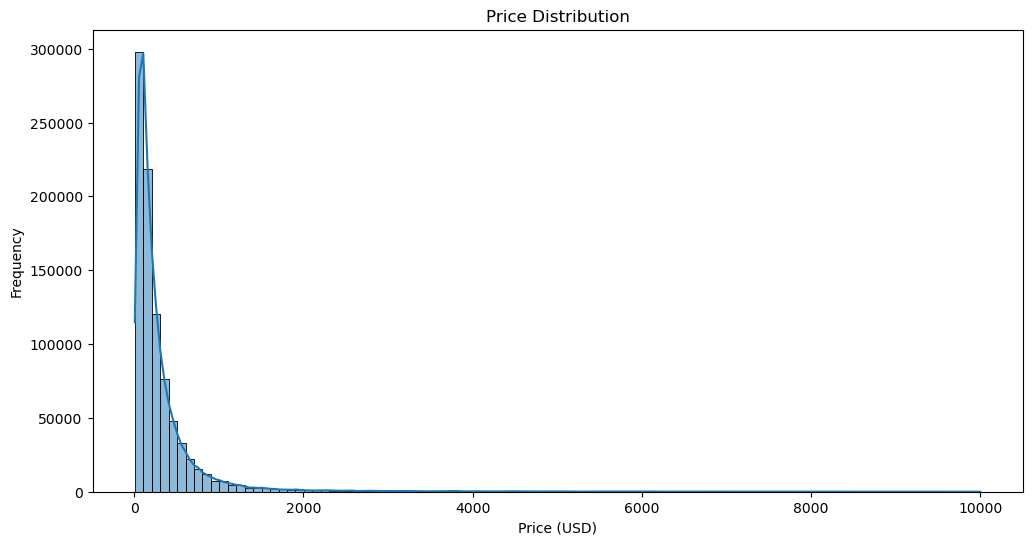

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram to inspect the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df2['price_usd'], bins=100, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

## Hypothesis Testing

### T-Test

In [50]:
from scipy.stats import ttest_ind

# Assuming df is your DataFrame and focusing on men's products.
men_df = df2[df2['product_gender_target'] == 'Men']

# Step 1: Remove rows with NaN values in 'price_usd' and 'last_word_product_type'
men_df = men_df.dropna(subset=['price_usd', 'last_word_product_type'])

# Step 2: Create a binary variable for 'Watch'
men_df['is_watch'] = men_df['last_word_product_type'].apply(lambda x: 1 if isinstance(x, str) and 'watch' in x.lower() else 0)

# Debug: Check counts of each group
watch_count = men_df[men_df['is_watch'] == 1].shape[0]
non_watch_count = men_df[men_df['is_watch'] == 0].shape[0]
print(f"Number of Watch items: {watch_count}")
print(f"Number of Non-Watch items: {non_watch_count}")

# Step 3: Split the data into two groups: watches and non-watches
watch_prices = men_df[men_df['is_watch'] == 1]['price_usd']
non_watch_prices = men_df[men_df['is_watch'] == 0]['price_usd']

# Ensure groups are not empty
if not watch_prices.empty and not non_watch_prices.empty:
    # Step 4: Perform an independent t-test (Check the equal_var parameter as needed)
    t_stat, p_value = ttest_ind(watch_prices, non_watch_prices, equal_var=False)

    # Format the p-value to 2 decimal places
    formatted_p_value = f"{p_value:.2f}"

    print("T-statistic:", t_stat)
    print("P-value:", formatted_p_value)

    # Interpretation
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("There is a significant difference between the prices of watches and non-watches for men's products.")
    else:
        print("There is no significant difference between the prices of watches and non-watches for men's products.")
else:
    print("Insufficient data to perform the t-test.")

Number of Watch items: 17644
Number of Non-Watch items: 398980
T-statistic: 94.56321779366658
P-value: 0.00
There is a significant difference between the prices of watches and non-watches for men's products.


### ANOVA

In [105]:
df_watch = df2[(df2["last_word_product_type"] == "watch")]["price_usd"]
df_non_watch = df2[(df2["last_word_product_type"] != "watch")]["price_usd"]
alpha = 0.10
st.f_oneway(df_watch, df_non_watch)

In [115]:
alpha = 0.10
st.f_oneway(df_watch, df_non_watch)

F_onewayResult(statistic=128562.54672620428, pvalue=0.0)

## Search watches by country

In [316]:
# Step 2: Identify watches using the 'last_word_product_type' column
men_df = men_df.dropna(subset=['last_word_product_type', 'seller_country'])

men_df['is_watch'] = men_df['last_word_product_type'].apply(lambda x: 'watch' in x.lower() if isinstance(x, str) else False)

# Step 3: Filter for watches
watch_df = men_df[men_df['is_watch']]

# Step 4: Group by country and count the number of watches
watch_counts_by_country = watch_df['seller_country'].value_counts().reset_index()

# Rename the columns for clarity
watch_counts_by_country.columns = ['Country', 'Number of Watches']

# Step 5: Sort the counts to find the country with the most watches
watch_counts_by_country = watch_counts_by_country.sort_values(by='Number of Watches', ascending=False)

watch_counts_by_country

,Country,Number of Watches
0,Japan,5154
1,United States,3000
2,Italy,2983
3,France,2504
4,Spain,926
5,United Kingdom,456
6,Germany,385
7,Hong Kong,291
8,Belgium,246
9,Romania,196


In [318]:
watch_counts_by_country.to_csv('country_watch_count.csv', index=False)

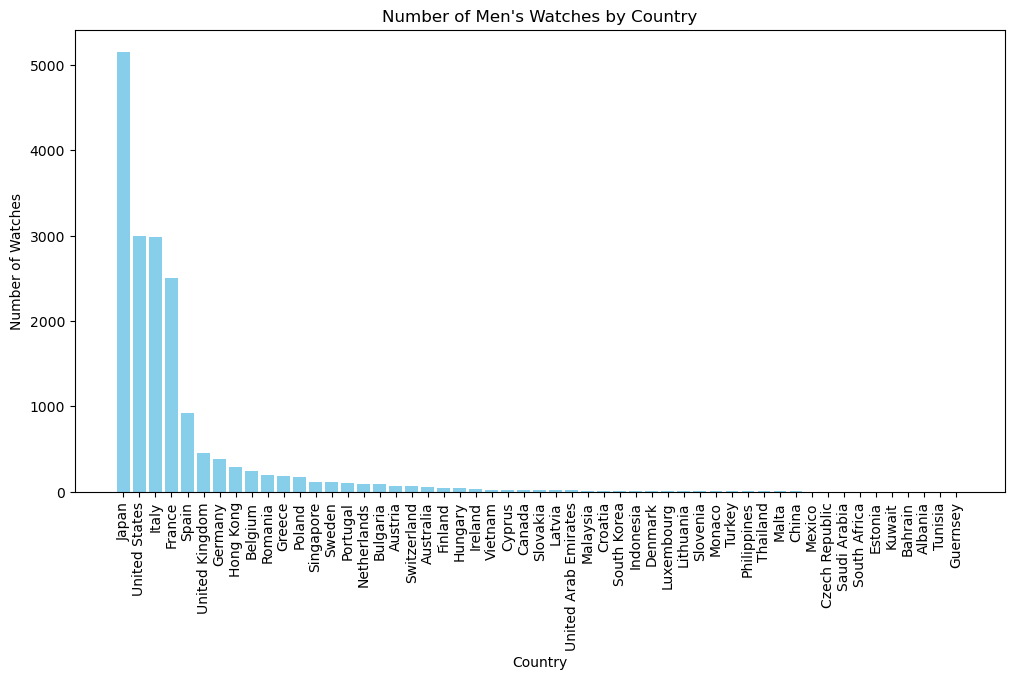

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(watch_counts_by_country['Country'], watch_counts_by_country['Number of Watches'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Watches')
plt.title('Number of Men\'s Watches by Country')
plt.xticks(rotation=90)
plt.show()

## check to see which country has the most expensive watches

In [326]:
# Step 1: Filter out the watches
watches_df = df2[df2["last_word_product_type"] == "watch"]

# Step 2: Group by the country
grouped_by_country = watches_df.groupby("seller_country")

# Step 3: Calculate max, mean, median prices and count of available products
stats = grouped_by_country["price_usd"].agg(
    max_price='max',
    min_price='min',
    mean_price='mean',
    median_price='median',
    count='size'
)

# Step 4: Sort by mean price in descending order
sorted_stats = stats.sort_values(by="count", ascending=False)

# Step 5: Format the results for display
sorted_stats["max_price"] = sorted_stats["max_price"].map('{:.2f}'.format)
sorted_stats["min_price"] = sorted_stats["min_price"].map('{:.2f}'.format)
sorted_stats["mean_price"] = sorted_stats["mean_price"].map('{:.2f}'.format)
sorted_stats["median_price"] = sorted_stats["median_price"].map('{:.2f}'.format)

# Display the sorted DataFrame
sorted_stats

,max_price,min_price,mean_price,median_price,count
seller_country,,,,,
Albania,383.40,74.12,161.985000,95.210,4
Australia,9328.47,27.21,1094.228627,516.950,102
Austria,8038.62,44.73,956.630984,364.230,122
Bahrain,8415.00,46.20,2860.806667,121.220,3
Belgium,9968.40,23.00,2429.712538,957.220,327
Bulgaria,9073.80,40.41,965.054713,345.060,157
Canada,9421.43,26.17,1376.865333,512.505,60
China,6615.53,147.04,1924.351429,760.410,7
Croatia,7604.10,28.12,1470.249545,152.080,44


In [330]:
# Reset index to make 'seller_country' a column
sorted_stats_reset = sorted_stats.reset_index()

# Export to CSV
sorted_stats_reset.to_csv('country_watch.csv', index=False)

In [208]:
watches_df.describe()

,product_id,product_like_count,sold,reserved,available,in_stock,should_be_gone,brand_id,price_usd,seller_price,seller_earning,has_cross_border_fees,buyers_fees,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,2.727700e+04,27277.000000,27277.000000,27277.0,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,27277.000000,2.727700e+04,27277.000000,27277.000000,2.727700e+04,2.727700e+04,27277.000000
mean,3.444746e+07,11.294314,0.005426,0.0,0.984492,0.005133,0.000037,3253.288265,1575.723580,1361.874052,1197.401991,0.994574,213.269417,1.377043e+07,528.837262,2325.950728,5.193840e+04,1.709424e+04,67.022543
std,8.591677e+06,28.287471,0.073461,0.0,0.123562,0.071459,0.006055,4094.653546,2049.548417,1798.930643,1592.252210,0.073461,308.522143,6.365315e+06,2908.388422,5897.003433,1.372311e+05,4.773874e+05,34.337856
min,1.870970e+05,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,14.300000,13.000000,0.000000,0.000000,0.000000,1.170000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2.902251e+07,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,434.000000,212.150000,181.050000,157.510000,1.000000,21.090000,9.313361e+06,6.000000,19.000000,0.000000e+00,3.400000e+01,53.000000
50%,3.802876e+07,4.000000,0.000000,0.0,1.000000,0.000000,0.000000,1625.000000,637.170000,532.500000,472.540000,1.000000,70.800000,1.327675e+07,55.000000,180.000000,1.520000e+02,1.650000e+02,85.000000
75%,4.107586e+07,11.000000,0.000000,0.0,1.000000,0.000000,0.000000,4324.000000,2159.820000,1849.750000,1615.610000,1.000000,272.500000,1.798555e+07,351.000000,2510.000000,1.737800e+04,1.411000e+03,90.000000
max,4.324801e+07,912.000000,1.000000,0.0,1.000000,1.000000,1.000000,18218.000000,10000.000000,10000.000000,9000.000000,1.000000,1663.440000,2.606968e+07,79728.000000,39628.000000,1.057919e+06,1.417508e+07,100.000000


## ANALYSIS MEN BRANDS

In [358]:
import pandas as pd

# Assuming df2 is your filtered DataFrame
# Step 1: Filter the DataFrame for "Men" products
men_df = df2[df2['product_gender_target'] == 'Men']

# Step 2: Calculate the count of products by brand
brand_counts = men_df['brand_name'].value_counts()

# Step 3: Identify the top 10 brands
top_10_brands = brand_counts.head(10)

# Step 4: Calculate the product ratio (percentage of total count) for the top 10 brands
total_products = brand_counts.sum()
top_10_percentages = (top_10_brands / total_products) * 100

# Step 5: Calculate the average price for each of the top 10 brands
average_prices = men_df.groupby('brand_name')['price_usd'].mean().loc[top_10_brands.index]

# Step 6: Combine into a DataFrame
top_10_brands_df = pd.DataFrame({
    'Brand Name': top_10_brands.index,
    'Product Count': top_10_brands.values,
    'Product Ratio (%)': top_10_percentages.values,
    'Average Price': average_prices.values
})

# Step 7: Round values to 2 decimal places for percentages and average prices
top_10_brands_df = top_10_brands_df.round({'Product Ratio (%)': 2, 'Average Price': 2})

top_10_brands_df

,Brand Name,Product Count,Product Ratio (%),Average Price
0,Gucci,17801,4.27,438.40
1,Burberry,14221,3.41,272.46
2,Dolce & Gabbana,12796,3.07,437.81
3,Nike,11040,2.65,149.77
4,Prada,9444,2.27,375.05
5,Polo Ralph Lauren,7624,1.83,124.17
6,Adidas,6831,1.64,122.95
7,Hermès,6009,1.44,608.11
8,Louis Vuitton,5982,1.44,751.68
9,Versace,5392,1.29,397.57


In [356]:
top_10_brands_df.to_csv('top_10_brands_df_global.csv', index=False)

In [368]:
# Step 1: Filter the DataFrame for "Men" products
men_df = df2[df2['product_gender_target'] == 'Men']

# Step 2: Calculate the count of products by brand
brand_counts = men_df['brand_name'].value_counts()

# Step 3: Identify the top 10 brands
top_10_brands = brand_counts.head(10)

# Step 4: Calculate the product ratio (percentage of total count) for the top 10 brands
total_products = brand_counts.sum()
top_10_percentages = (top_10_brands / total_products) * 100

# Step 5: Calculate the average price for each of the top 10 brands
average_prices = men_df.groupby('brand_name')['price_usd'].mean().loc[top_10_brands.index]

# Step 6: Combine into a DataFrame
top_10_brands_df = pd.DataFrame({
    'Brand Name': top_10_brands.index,
    'Product Count': top_10_brands.values,
    'Product Ratio (%)': top_10_percentages.values,
    'Average Price': average_prices.values
})

# Step 7: Round values to 2 decimal places for percentages and average prices
top_10_brands_df = top_10_brands_df.round({'Product Ratio (%)': 2, 'Average Price': 2})

# Step 8: Add ranking column
top_10_brands_df['Brand Rank'] = top_10_brands_df['Product Count'].rank(ascending=False, method='dense').astype(int)

# Step 9: Include category split within the top 10 brands
category_split = men_df[men_df['brand_name'].isin(top_10_brands.index)]
category_stats = category_split.groupby(['brand_name', 'product_category']).agg(
    Product_Count=('price_usd', 'size'),
    Average_Price=('price_usd', 'mean')
).reset_index()

# Step 10: Round category stats
category_stats = category_stats.round({'Average_Price': 2})

# Step 11: Merge category stats with top brand rankings
final_df = pd.merge(category_stats, top_10_brands_df[['Brand Name', 'Brand Rank']], left_on='brand_name', right_on='Brand Name', how='left')

# Sorting by Brand Rank to maintain the ranking order
final_df = final_df.sort_values(by=['Brand Rank', 'Product_Count'], ascending=[True, False])

# Reorder columns, if desired
final_df = final_df[['Brand Rank', 'brand_name', 'product_category', 'Product_Count', 'Average_Price']]
final_df.columns = ['Brand Rank', 'Brand Name', 'Category', 'Product Count', 'Average Price']

# Display the final DataFrame
print("Top 10 Brands Overview:")
print(top_10_brands_df)
print("\nCategory Stats for Top 10 Brands with Brand Ranking:")
final_df

Top 10 Brands Overview:
          Brand Name  Product Count  Product Ratio (%)  Average Price  \
0              Gucci          17801               4.27         438.40   
1           Burberry          14221               3.41         272.46   
2    Dolce & Gabbana          12796               3.07         437.81   
3               Nike          11040               2.65         149.77   
4              Prada           9444               2.27         375.05   
5  Polo Ralph Lauren           7624               1.83         124.17   
6             Adidas           6831               1.64         122.95   
7             Hermès           6009               1.44         608.11   
8      Louis Vuitton           5982               1.44         751.68   
9            Versace           5392               1.29         397.57   

   Brand Rank  
0           1  
1           2  
2           3  
3           4  
4           5  
5           6  
6           7  
7           8  
8           9  
9          1

,Brand Rank,Brand Name,Category,Product Count,Average Price
11,1,Gucci,Men Shoes,8180,436.08
9,1,Gucci,Men Accessories,6105,301.33
10,1,Gucci,Men Clothing,3516,681.78
4,2,Burberry,Men Clothing,10574,292.08
3,2,Burberry,Men Accessories,2750,164.44
5,2,Burberry,Men Shoes,897,372.48
8,3,Dolce & Gabbana,Men Shoes,4760,550.21
7,3,Dolce & Gabbana,Men Clothing,4224,463.05
6,3,Dolce & Gabbana,Men Accessories,3812,269.50
20,4,Nike,Men Shoes,6300,192.62


In [370]:
final_df.to_csv('top_10_brands_df_global_by_cat.csv', index=False)

Top 10 Brands Overview:
          Brand Name  Product Count  Product Ratio (%)  Average Price  \
0              Gucci          17801               4.27         438.40   
1           Burberry          14221               3.41         272.46   
2    Dolce & Gabbana          12796               3.07         437.81   
3               Nike          11040               2.65         149.77   
4              Prada           9444               2.27         375.05   
5  Polo Ralph Lauren           7624               1.83         124.17   
6             Adidas           6831               1.64         122.95   
7             Hermès           6009               1.44         608.11   
8      Louis Vuitton           5982               1.44         751.68   
9            Versace           5392               1.29         397.57   

   Brand Rank  
0           1  
1           2  
2           3  
3           4  
4           5  
5           6  
6           7  
7           8  
8           9  
9          1

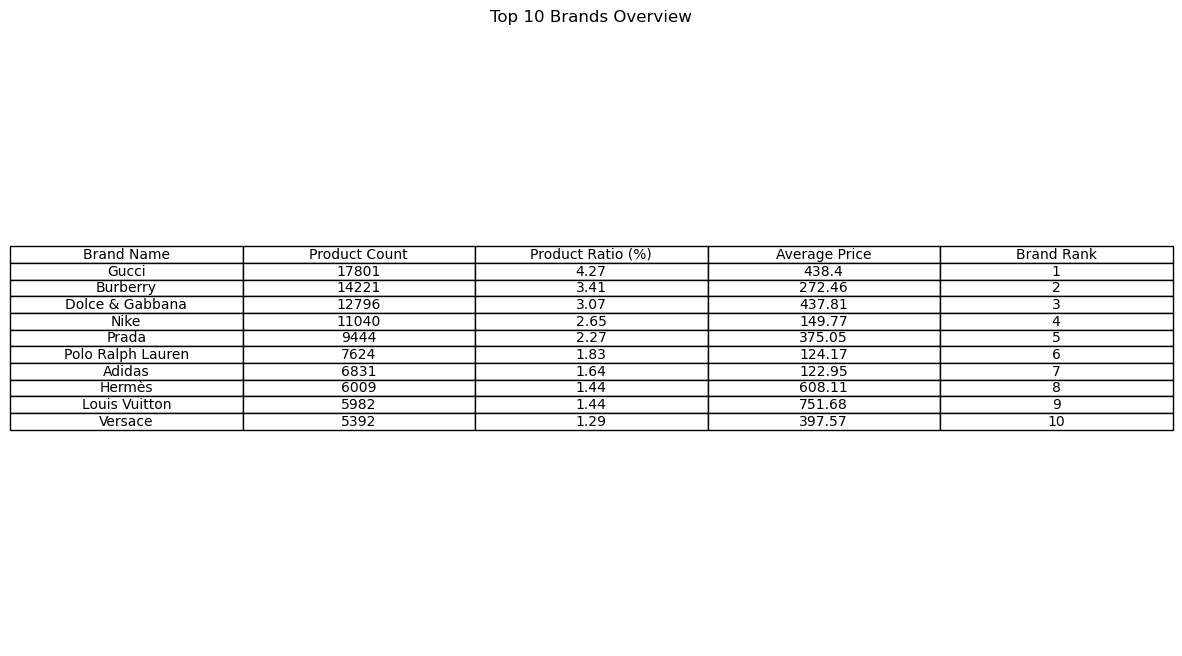

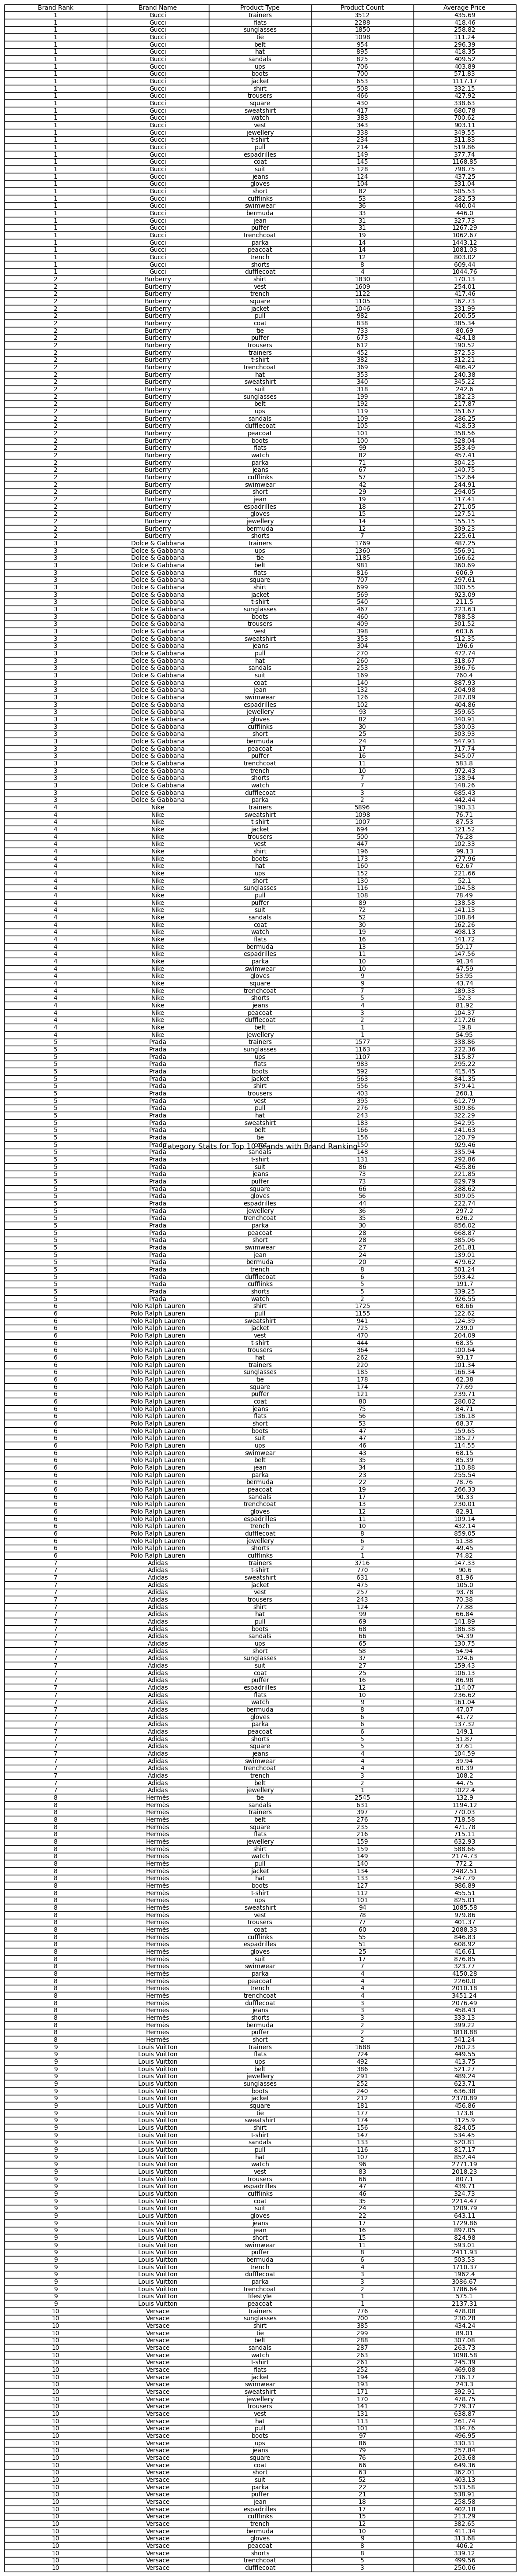

In [372]:
# Step 1: Filter the DataFrame for "Men" products
men_df = df2[df2['product_gender_target'] == 'Men']

# Step 2: Calculate the count of products by brand
brand_counts = men_df['brand_name'].value_counts()

# Step 3: Identify the top 10 brands
top_10_brands = brand_counts.head(10)

# Step 4: Calculate the product ratio (percentage of total count) for the top 10 brands
total_products = brand_counts.sum()
top_10_percentages = (top_10_brands / total_products) * 100

# Step 5: Calculate the average price for each of the top 10 brands
average_prices = men_df.groupby('brand_name')['price_usd'].mean().loc[top_10_brands.index]

# Step 6: Combine into a DataFrame
top_10_brands_df = pd.DataFrame({
    'Brand Name': top_10_brands.index,
    'Product Count': top_10_brands.values,
    'Product Ratio (%)': top_10_percentages.values,
    'Average Price': average_prices.values
})

# Step 7: Round values to 2 decimal places for percentages and average prices
top_10_brands_df = top_10_brands_df.round({'Product Ratio (%)': 2, 'Average Price': 2})

# Step 8: Add ranking column
top_10_brands_df['Brand Rank'] = top_10_brands_df['Product Count'].rank(ascending=False, method='dense').astype(int)

# Step 9: Include category split within the top 10 brands
category_split = men_df[men_df['brand_name'].isin(top_10_brands.index)]
category_stats = category_split.groupby(['brand_name', 'last_word_product_type']).agg(
    Product_Count=('price_usd', 'size'),
    Average_Price=('price_usd', 'mean')
).reset_index()

# Step 10: Round category stats
category_stats = category_stats.round({'Average_Price': 2})

# Step 11: Merge category stats with top brand rankings
final_df = pd.merge(category_stats, top_10_brands_df[['Brand Name', 'Brand Rank']], left_on='brand_name', right_on='Brand Name', how='left')

# Sorting by Brand Rank to maintain the ranking order
final_df = final_df.sort_values(by=['Brand Rank', 'Product_Count'], ascending=[True, False])

# Reorder columns, if desired
final_df = final_df[['Brand Rank', 'brand_name', 'last_word_product_type', 'Product_Count', 'Average_Price']]
final_df.columns = ['Brand Rank', 'Brand Name', 'Product Type', 'Product Count', 'Average Price']

# Display the final DataFrame
print("Top 10 Brands Overview:")
print(top_10_brands_df)
print("\nCategory Stats for Top 10 Brands with Brand Ranking:")
print(final_df)

# Export to CSV
top_10_brands_df.to_csv('top_10_brands_overview.csv', index=False)
final_df.to_csv('category_stats_with_brand_ranking.csv', index=False)

# Export to PDF using matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

def export_df_to_pdf(file_name, df, title):
    pdf = matplotlib.backends.backend_pdf.PdfPages(file_name)
    fig, ax = plt.subplots(figsize=(15, 8)) # Adjust size as needed
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    plt.title(title)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()

# Export both DataFrames to PDF
export_df_to_pdf('top_10_brands_overview.pdf', top_10_brands_df, 'Top 10 Brands Overview')
export_df_to_pdf('category_stats_with_brand_ranking.pdf', final_df, 'Category Stats for Top 10 Brands with Brand Ranking')

We see that the brands with the most products in the Men offer are not watches brands

### FOCUS ON WATCH BRANDS

In [220]:
import pandas as pd

# Assuming df2 is your DataFrame
# Step 1: Filter the DataFrame for "Men" products and "watch"
men_watch_df = df2[(df2['product_gender_target'] == 'Men') & (df2['last_word_product_type'] == 'watch')]

# Step 2: Calculate the count of products by brand
brand_counts = men_watch_df['brand_name'].value_counts()

# Step 3: Identify the top 10 brands
top_10_brands = brand_counts.head(10)

# Step 4: Calculate the product ratio (percentage of total count) for the top 10 brands
total_products = brand_counts.sum()
top_10_percentages = (top_10_brands / total_products) * 100

# Step 5: Calculate the average price for each of the top 10 brands
average_prices = men_watch_df.groupby('brand_name')['price_usd'].mean().loc[top_10_brands.index]

# Step 6: Combine into a DataFrame
top_10_brands_df = pd.DataFrame({
    'Brand Name': top_10_brands.index,
    'Product Count': top_10_brands.values,
    'Product Ratio (%)': top_10_percentages.values,
    'Average Price': average_prices.values
})

# Step 7: Round values to 2 decimal places for percentages and average prices
top_10_brands_df = top_10_brands_df.round({'Product Ratio (%)': 2, 'Average Price': 2})
top_10_brands_df

,Brand Name,Product Count,Product Ratio (%),Average Price
0,Omega,1781,10.09,2661.15
1,SEIKO,1401,7.94,1271.24
2,Tag Heuer,649,3.68,1876.72
3,Breitling,521,2.95,3845.65
4,Citizen,495,2.81,584.38
5,Rolex,484,2.74,6390.50
6,Cartier,436,2.47,4281.01
7,Tissot,422,2.39,618.94
8,Casio,421,2.39,336.04
9,IWC,417,2.36,3536.26


In [310]:
top_10_brands_df.to_csv('top_10_brands_df.csv', index=False)

In [242]:
import pandas as pd

# Assuming df2 is your DataFrame
# Countries of interest
countries_of_interest = ['Japan', 'United States', 'Italy', 'France', 'Spain', 'United Kingdom']

# Step 1: Filter the DataFrame for "Men" products, "watch", and specified countries
filtered_df = df2[
    (df2['product_gender_target'] == 'Men') & 
    (df2['last_word_product_type'] == 'watch') & 
    (df2['seller_country'].isin(countries_of_interest))
]

# Step 2: Group by country and brand, then calculate stats
grouped = filtered_df.groupby(['seller_country', 'brand_name']).agg(
    Product_Count=('price_usd', 'size'),
    Average_Price=('price_usd', 'mean')
).reset_index()

# Step 3: Function to get top N brands per country
def get_top_n_brands(group, n=100):
    return group.nlargest(n, 'Product_Count')

# Step 4: Extract top 10 brands for each country
top_brands_per_country = grouped.groupby('seller_country').apply(get_top_n_brands).reset_index(drop=True)

# Step 5: Calculate total product count per country
total_products_per_country = filtered_df.groupby('seller_country')['brand_name'].count().reset_index()
total_products_per_country.columns = ['seller_country', 'Total_Product_Count']

# Merge total product count per country with top brands DataFrame
top_brands_per_country = pd.merge(top_brands_per_country, total_products_per_country, on='seller_country')

# Step 6: Calculate product ratio
top_brands_per_country['Product_Ratio (%)'] = (
    top_brands_per_country['Product_Count'] / top_brands_per_country['Total_Product_Count']
) * 100

# Step 7: Round values
top_brands_per_country = top_brands_per_country.round({'Average_Price': 2, 'Product_Ratio (%)': 2})

# Step 8: Reorder and rename columns if needed
top_brands_per_country = top_brands_per_country[['seller_country', 'brand_name', 'Product_Count', 'Average_Price', 'Product_Ratio (%)']]
top_brands_per_country.columns = ['Country', 'Brand Name', 'Product Count', 'Average Price', 'Product Ratio (%)']

# Display the organized DataFrame
top_brands_per_country

/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_96211/2882714207.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_brands_per_country = grouped.groupby('seller_country').apply(get_top_n_brands).reset_index(drop=True)


,Country,Brand Name,Product Count,Average Price,Product Ratio (%)
0,France,SEIKO,177,614.95,7.07
1,France,Boss,163,242.46,6.51
2,France,Emporio Armani,155,318.77,6.19
3,France,Casio,128,235.23,5.11
4,France,Versace,119,1189.00,4.75
...,...,...,...,...,...
587,United States,CHARRIOL,2,1946.45,0.07
588,United States,Carrera Y Carrera,2,1995.15,0.07
589,United States,Concord,2,3631.45,0.07
590,United States,DUNHILL,2,289.80,0.07


In [308]:
top_brands_per_country.to_csv('top_brands_per_country_full.csv', index=False)

### TOP 10 WATCH BRANDS BY COUNTRY

In [348]:
import pandas as pd

# Assuming df2 is your DataFrame
# Countries of interest
countries_of_interest = ['Japan', 'United States', 'Italy', 'France', 'Spain', 'United Kingdom']

# Step 1: Filter the DataFrame for "Men" products, "watch", and specified countries
filtered_df = df2[
    (df2['product_gender_target'] == 'Men') & 
    (df2['last_word_product_type'] == 'watch') & 
    (df2['seller_country'].isin(countries_of_interest))
]

# Step 2: Group by country and brand, then calculate stats
grouped = filtered_df.groupby(['seller_country', 'brand_name']).agg(
    Product_Count=('price_usd', 'size'),
    Average_Price=('price_usd', 'mean')
).reset_index()

# Step 3: Function to get top N brands per country
def get_top_n_brands(group, n=10):
    return group.nlargest(n, 'Product_Count')

# Step 4: Extract top 10 brands for each country
top_brands_per_country = grouped.groupby('seller_country').apply(get_top_n_brands).reset_index(drop=True)

# Step 5: Calculate total product count per country
total_products_per_country = filtered_df.groupby('seller_country')['brand_name'].count().reset_index()
total_products_per_country.columns = ['seller_country', 'Total_Product_Count']

# Merge total product count per country with top brands DataFrame
top_brands_per_country = pd.merge(top_brands_per_country, total_products_per_country, on='seller_country')

# Step 6: Calculate product ratio
top_brands_per_country['Product_Ratio (%)'] = (
    top_brands_per_country['Product_Count'] / top_brands_per_country['Total_Product_Count']
) * 100

# Step 7: Round values
top_brands_per_country = top_brands_per_country.round({'Average_Price': 2, 'Product_Ratio (%)': 2})

# Step 8: Reorder and rename columns if needed
top_brands_per_country = top_brands_per_country[['seller_country', 'brand_name', 'Product_Count', 'Average_Price', 'Product_Ratio (%)']]
top_brands_per_country.columns = ['Country', 'Brand Name', 'Product Count', 'Average Price', 'Product Ratio (%)']

# Display the organized DataFrame
top_brands_per_country

/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_96211/942255919.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_brands_per_country = grouped.groupby('seller_country').apply(get_top_n_brands).reset_index(drop=True)


,Country,Brand Name,Product Count,Average Price,Product Ratio (%)
0,France,SEIKO,177,614.95,7.07
1,France,Boss,163,242.46,6.51
2,France,Emporio Armani,155,318.77,6.19
3,France,Casio,128,235.23,5.11
4,France,Versace,119,1189.00,4.75
5,France,Omega,117,2044.51,4.67
6,France,G-Shock,79,272.94,3.15
7,France,Tissot,70,528.32,2.80
8,France,Cartier,56,4262.54,2.24
9,France,Longines,53,1146.42,2.12


In [ ]:
top_brands_per_country.to_csv('top_brands_per_country.csv', index=False)

In [352]:
import pandas as pd

# Assuming df2 is your DataFrame
# Countries of interest
countries_of_interest = ['Japan', 'United States', 'Italy', 'France', 'Spain', 'United Kingdom']

# Step 1: Filter the DataFrame for "Men" products, "watch", and specified countries
filtered_df = df2[
    (df2['product_gender_target'] == 'Men') & 
    (df2['last_word_product_type'] == 'watch') & 
    (df2['seller_country'].isin(countries_of_interest))
]

# Step 2: Group by country and brand, then calculate stats
grouped = filtered_df.groupby(['brand_name', 'seller_country']).agg(
    Product_Count=('price_usd', 'size'),
    Average_Price=('price_usd', 'mean')
).reset_index()

# Step 3: Function to get top N brands per country
def get_top_n_brands(group, n=10):
    return group.nlargest(n, 'Product_Count')

# Step 4: Extract top 10 brands for each country
top_brands_per_country = grouped.groupby('brand_name').apply(get_top_n_brands).reset_index(drop=True)

# Step 5: Calculate total product count per brand
total_products_per_brand = grouped.groupby('brand_name')['Product_Count'].sum().reset_index()
total_products_per_brand.columns = ['brand_name', 'Total_Product_Count']

# Merge total product count per brand with top brands per country DataFrame
top_brands_per_country = pd.merge(top_brands_per_country, total_products_per_brand, on='brand_name')

# Step 6: Calculate product ratio for each brand per country
top_brands_per_country['Product_Ratio (%)'] = (
    top_brands_per_country['Product_Count'] / top_brands_per_country['Total_Product_Count']
) * 100

# Step 7: Round values
top_brands_per_country = top_brands_per_country.round({'Average_Price': 2, 'Product_Ratio (%)': 2})

# Step 8: Reorder and rename columns if needed
top_brands_per_country = top_brands_per_country[['brand_name', 'seller_country', 'Product_Count', 'Average_Price', 'Product_Ratio (%)']]
top_brands_per_country.columns = ['Brand Name', 'Country', 'Product Count', 'Average Price', 'Product Ratio (%)']

# Step 9: Rank brands overall
top_brands_per_country['Brand Rank'] = top_brands_per_country.groupby('Brand Name')['Product Count'].transform('sum').rank(ascending=False, method='dense')

# Step 10: Rank countries within each brand
top_brands_per_country['Country Rank'] = top_brands_per_country.groupby('Brand Name')['Product Count'].rank(ascending=False, method='dense')

# Display the organized DataFrame
top_brands_per_country.sort_values(['Brand Rank', 'Country Rank'])

/var/folders/m0/_0k_jj7j231cxr746m3qlspm0000gn/T/ipykernel_96211/2446835447.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_brands_per_country = grouped.groupby('brand_name').apply(get_top_n_brands).reset_index(drop=True)


NameError: name 'top_brands_per_country_full' is not defined

In [354]:
top_brands_per_country.to_csv('top_brands_per_country_full.csv', index=False)

In [262]:
from scipy.stats import chi2_contingency

# Step 1: Filter the DataFrame for "watch" products
watch_df = df2[df2['last_word_product_type'] == 'watch']
crosstab_result = pd.crosstab(watch_df['seller_country'], watch_df['brand_name'])

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(105564.11349108192, 0.0)

In [382]:
##ANOVA

from scipy.stats import f_oneway

# Assuming df2 is your DataFrame

# Step 1: Filter the DataFrame for "watch" products
watch_df = df2[df2['last_word_product_type'] == 'watch']

# Step 2: Group the data by brand and extract price data
brands = watch_df['brand_name'].unique()
price_groups = [watch_df[watch_df['brand_name'] == brand]['price_usd'] for brand in brands]

# Step 3: Perform the ANOVA test
f_statistic, p_value = f_oneway(*price_groups)

# Print the results
print("ANOVA F-statistic:", f_statistic)
print("p-value:", p_value)

ANOVA F-statistic: 65.14796058884477
p-value: 0.0


The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the extremely low ( p )-value, we reject the null hypothesis. This implies that there's a significant association between country and brand in the dataset.

In [376]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df2 is your DataFrame

# Step 1: Filter the DataFrame for "watch" products sold in Japan
watch_df_jp = df2[(df2['last_word_product_type'] == 'watch') & (df2['seller_country'] == 'Japan')]

# Step 2: Create a contingency table of `seller_country` vs. `brand_name`
crosstab_result_jp = pd.crosstab(watch_df_jp['seller_country'], watch_df_jp['brand_name'])

crosstab_result_jp

brand_name,Alfred Dunhill,Alpina,Audemars Piguet,BALL,Baume Et Mercier,Bedat&Co,Bell & Ross,Blancpain,Boucheron,Breguet,...,Tudor,Ulysse Nardin,Universal Geneve,Vacheron Constantin,Van Cleef & Arpels,Versace,Vivienne Westwood,Yves Saint Laurent,Zenith,gaga milano
seller_country,,,,,,,,,,,,,,,,,,,,,
Japan,8,19,12,1,4,2,51,13,5,26,...,204,14,4,13,8,12,4,4,111,28


In [380]:
# Step 3: Perform the chi-squared test
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result_jp)

# Print the results
print("Chi-squared Test Statistic:", chi2_statistic)
print("p-value:", chi2_p_value)

Chi-squared Test Statistic: 0.0
p-value: 1.0


As p-value equals one we confirm H0 meaning brand and Japan are independent in the dataset

In [291]:
import pandas as pd

# Assuming df2 is your DataFrame
# Step 1: Filter the DataFrame for "Men" products that are "watch"
filtered_df = df2[
    (df2['product_gender_target'] == 'Men') & 
    (df2['last_word_product_type'] == 'watch')
]

# Step 2: Group by product_condition and brand_name, then calculate stats
grouped = filtered_df.groupby(['product_condition', 'brand_name']).agg(
    Product_Count=('price_usd', 'size'),
    Average_Price=('price_usd', 'mean')
).reset_index()

# Step 3: Calculate the total product count per product condition
total_products_per_condition = filtered_df.groupby('product_condition')['brand_name'].count().reset_index()
total_products_per_condition.columns = ['product_condition', 'Total_Product_Count']

# Step 4: Merge total product count per condition with the grouped data DataFrame
condition_per_brand = pd.merge(grouped, total_products_per_condition, on='product_condition')

# Step 5: Calculate product ratio
condition_per_brand['Product_Ratio (%)'] = (
    condition_per_brand['Product_Count'] / condition_per_brand['Total_Product_Count']
) * 100

# Step 6: Round values
condition_per_brand = condition_per_brand.round({'Average_Price': 2, 'Product_Ratio (%)': 2})

# Step 7: Reorder and rename columns if needed
condition_per_brand = condition_per_brand[['product_condition', 'brand_name', 'Product_Count', 'Average_Price', 'Product_Ratio (%)']]
condition_per_brand.columns = ['Product Condition', 'Brand Name', 'Product Count', 'Average Price', 'Product Ratio (%)']

# Display the organized DataFrame
condition_per_brand

,Product Condition,Brand Name,Product Count,Average Price,Product Ratio (%)
0,Fair condition,Adidas,2,38.01,0.07
1,Fair condition,Alfred Dunhill,1,302.65,0.04
2,Fair condition,Alpina,2,1022.40,0.07
3,Fair condition,Armani Exchange,2,76.36,0.07
4,Fair condition,Audemars Piguet,10,3614.58,0.36
...,...,...,...,...,...
1116,Very good condition,Zadig & Voltaire,3,148.25,0.06
1117,Very good condition,Zenith,71,3967.25,1.48
1118,Very good condition,Zodiac,5,1012.28,0.10
1119,Very good condition,gaga milano,12,543.36,0.25


In [301]:
# Step 1: Filter the DataFrame for "Men" products that are "watch"
filtered_df = df2[
    (df2['product_gender_target'] == 'Men') & 
    (df2['last_word_product_type'] == 'watch')
]

# Step 2: Select the relevant columns
selected_columns = filtered_df[['seller_country', 'product_condition', 'brand_name', 'price_usd']]

# Step 3: Rename columns for clarity
selected_columns.columns = ['Country', 'Product Condition', 'Brand Name', 'Price (USD)']

# Step 4: Sort the DataFrame for better organization (optional)
selected_columns = selected_columns.sort_values(by=['Country', 'Product Condition', 'Brand Name'])

# Display the organized DataFrame
selected_columns

,Country,Product Condition,Brand Name,Price (USD)
477261,Albania,Good condition,Diesel,94.57
474421,Albania,Good condition,Paul Picot,383.40
393398,Australia,Fair condition,RADO,248.76
389576,Australia,Good condition,Diesel,45.09
396922,Australia,Good condition,Emporio Armani,62.19
...,...,...,...,...
421724,Vietnam,Very good condition,Raymond Weil,1958.00
469095,Vietnam,Very good condition,Tag Heuer,994.00
455708,Vietnam,Very good condition,Universal Geneve,496.00
455709,Vietnam,Very good condition,Universal Geneve,499.00


In [304]:
selected_columns.to_csv('country_condition_brand.csv', index=False)